# LIBRERÍAS:

In [154]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# LIMPIEZA DE DATOS:

In [155]:
# Observamos que el DF no tiene nombre en las columnas, por ellos vamos a asignarselos a continuación:
nombres_columnas = ["customer_number","offer_accepted","reward","mailer_type","income_level","bank_accounts_open","overdraft_protection","credit_rating","credit_cards_held","homes_owned","household_size","own_your_home","average_balance","q1_balance","q2_balance","q3_balance","q4_balance"]

In [156]:
# Leemos y exploramos los datos
df=pd.read_csv(r"C:\Users\anasa\Desktop\Ana\IRONHACK\Mini-proyecto\Riesgos crediticio\DB\creditcardmarketing.csv", names=nombres_columnas)

In [157]:
df.head()

customer_number offer_accepted     reward mailer_type income_level  \
0                1             No  Air Miles      Letter         High   
1                2             No  Air Miles      Letter       Medium   
2                3             No  Air Miles    Postcard         High   
3                4             No  Air Miles      Letter       Medium   
4                5             No  Air Miles      Letter       Medium   

   bank_accounts_open overdraft_protection credit_rating  credit_cards_held  \
0                   1                   No          High                  2   
1                   1                   No        Medium                  2   
2                   2                   No        Medium                  2   
3                   2                   No          High                  1   
4                   1                   No        Medium                  2   

   homes_owned  household_size own_your_home  average_balance  q1_balance  \
0            1               4            No          1160.75      1669.0   
1            2               5           Yes           147.25        39.0   
2            1               2           Yes           276.50       367.0   
3            1               4            No          1219.00      1578.0   
4            1               6           Yes          1211.00      2140.0   

   q2_balance  q3_balance  q4_balance  
0       877.0      1095.0      1002.0  
1       106.0        78.0       366.0  
2       352.0       145.0       242.0  
3      1760.0      1119.0       419.0  
4      1357.0       982.0       365.0

In [158]:
df.shape

(18000, 17)

In [159]:
# Observamos que el DF no tiene nombre en las columnas, por ellos vamos a asignarselos a continuación:
nombres_columnas = ["customer_number","offer_accepted","reward","mailer_type","income_level","bank_accounts_open","overdraft_protection","credit_rating","credit_cards_held","homes_owned","household_size","own_your_home","average_balance","q1_balance","q2_balance","q3_balance","q4_balance"]
df.columns = nombres_columnas

# Mostrar el DataFrame con nombres de columnas
df

customer_number offer_accepted     reward mailer_type income_level  \
0                    1             No  Air Miles      Letter         High   
1                    2             No  Air Miles      Letter       Medium   
2                    3             No  Air Miles    Postcard         High   
3                    4             No  Air Miles      Letter       Medium   
4                    5             No  Air Miles      Letter       Medium   
...                ...            ...        ...         ...          ...   
17995            17996             No  Cash Back      Letter         High   
17996            17997             No  Cash Back      Letter         High   
17997            17998             No  Cash Back      Letter         High   
17998            17999             No  Cash Back      Letter       Medium   
17999            18000             No  Cash Back      Letter          Low   

       bank_accounts_open overdraft_protection credit_rating  \
0                       1                   No          High   
1                       1                   No        Medium   
2                       2                   No        Medium   
3                       2                   No          High   
4                       1                   No        Medium   
...                   ...                  ...           ...   
17995                   1                   No           Low   
17996                   1                   No           Low   
17997                   1                   No           Low   
17998                   1                   No        Medium   
17999                   2                   No        Medium   

       credit_cards_held  homes_owned  household_size own_your_home  \
0                      2            1               4            No   
1                      2            2               5           Yes   
2                      2            1               2           Yes   
3                      1            1               4            No   
4                      2            1               6           Yes   
...                  ...          ...             ...           ...   
17995                  1            1               5           Yes   
17996                  3            1               3           Yes   
17997                  2            1               4            No   
17998                  4            2               2           Yes   
17999                  2            1               3            No   

       average_balance  q1_balance  q2_balance  q3_balance  q4_balance  
0              1160.75      1669.0       877.0      1095.0      1002.0  
1               147.25        39.0       106.0        78.0       366.0  
2               276.50       367.0       352.0       145.0       242.0  
3              1219.00      1578.0      1760.0      1119.0       419.0  
4              1211.00      2140.0      1357.0       982.0       365.0  
...                ...         ...         ...         ...         ...  
17995           167.50       136.0        65.0        71.0       398.0  
17996           850.50       984.0       940.0       943.0       535.0  
17997          1087.25       918.0       767.0      1170.0      1494.0  
17998          1022.25       626.0       983.0       865.0      1615.0  
17999          1056.00       265.0      1378.0      1978.0       603.0  

[18000 rows x 17 columns]

In [160]:
# Supongamos que tienes un DataFrame llamado df
# Usa el método isna() para identificar los valores NaN y luego suma los True (1) para contarlos en cada columna
conteo_nan_por_columna = df.isna().sum()

# Muestra el conteo de NaN por columna
print(conteo_nan_por_columna)

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64


In [161]:
# Checkeamos tambien si existen celdas vacías
# Suma los valores nulos en cada columna
conteo_nulos_por_columna = df.isnull().sum()

# Muestra el conteo de valores nulos por columna
print(conteo_nulos_por_columna)
# Como no hay no hacemos ningun otro analisis

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64


In [162]:
# Vamos a checkear tambien si existen filas duplicadas en el DF para eliminarlas
# Suma los valores duplicados en el DataFrame
total_filas_duplicadas = df.duplicated().sum()

# Muestra el total de filas duplicadas
print("Total de filas duplicadas:", total_filas_duplicadas)
# Como no hay no hacemos ningun otro analisis

Total de filas duplicadas: 0


In [163]:
# Observamos cuantas filas hay con nan para valorar si quitarlas o transformarlos por 0, por la media etc...
# Usamos el método any(axis=1) para identificar las filas que contienen al menos un NaN, 
# luego sumamos los True (1) para contarlas
conteo_filas_con_nan = df.isna().any(axis=1).sum()

# Muestra el conteo de filas con NaN
print("Número de filas con al menos un NaN:", conteo_filas_con_nan)

Número de filas con al menos un NaN: 24


In [164]:
# Al ser las mismas filas las que tienen el nan y teniendo en cuenta que son solo 24 de 17999, podemos considerar quitarlas
# Para ello aquellas filas con Nans:
df=df.dropna()
df

customer_number offer_accepted     reward mailer_type income_level  \
0                    1             No  Air Miles      Letter         High   
1                    2             No  Air Miles      Letter       Medium   
2                    3             No  Air Miles    Postcard         High   
3                    4             No  Air Miles      Letter       Medium   
4                    5             No  Air Miles      Letter       Medium   
...                ...            ...        ...         ...          ...   
17995            17996             No  Cash Back      Letter         High   
17996            17997             No  Cash Back      Letter         High   
17997            17998             No  Cash Back      Letter         High   
17998            17999             No  Cash Back      Letter       Medium   
17999            18000             No  Cash Back      Letter          Low   

       bank_accounts_open overdraft_protection credit_rating  \
0                       1                   No          High   
1                       1                   No        Medium   
2                       2                   No        Medium   
3                       2                   No          High   
4                       1                   No        Medium   
...                   ...                  ...           ...   
17995                   1                   No           Low   
17996                   1                   No           Low   
17997                   1                   No           Low   
17998                   1                   No        Medium   
17999                   2                   No        Medium   

       credit_cards_held  homes_owned  household_size own_your_home  \
0                      2            1               4            No   
1                      2            2               5           Yes   
2                      2            1               2           Yes   
3                      1            1               4            No   
4                      2            1               6           Yes   
...                  ...          ...             ...           ...   
17995                  1            1               5           Yes   
17996                  3            1               3           Yes   
17997                  2            1               4            No   
17998                  4            2               2           Yes   
17999                  2            1               3            No   

       average_balance  q1_balance  q2_balance  q3_balance  q4_balance  
0              1160.75      1669.0       877.0      1095.0      1002.0  
1               147.25        39.0       106.0        78.0       366.0  
2               276.50       367.0       352.0       145.0       242.0  
3              1219.00      1578.0      1760.0      1119.0       419.0  
4              1211.00      2140.0      1357.0       982.0       365.0  
...                ...         ...         ...         ...         ...  
17995           167.50       136.0        65.0        71.0       398.0  
17996           850.50       984.0       940.0       943.0       535.0  
17997          1087.25       918.0       767.0      1170.0      1494.0  
17998          1022.25       626.0       983.0       865.0      1615.0  
17999          1056.00       265.0      1378.0      1978.0       603.0  

[17976 rows x 17 columns]

In [165]:
conteo_filas_con_nan = df.isna().any(axis=1).sum()

# Muestra el conteo de filas con NaN, no hay no hago mas.
print("Número de filas con al menos un NaN:", conteo_filas_con_nan)

Número de filas con al menos un NaN: 0


In [166]:
# 1.4 Ademas podemos agrupar variables entre numericas y categoricas para porsteriormente codificar las columnas de variables ctegoricas:
# Para ello en primer lugar analizaremos los tipos de datos que tenemos:
df.dtypes

customer_number           int64
offer_accepted           object
reward                   object
mailer_type              object
income_level             object
bank_accounts_open        int64
overdraft_protection     object
credit_rating            object
credit_cards_held         int64
homes_owned               int64
household_size            int64
own_your_home            object
average_balance         float64
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

In [167]:
# Supongamos que 'df' es tu DataFrame y quieres obtener los valores únicos de estas columnas
columnas = ['offer_accepted', 'reward', 'mailer_type', 'income_level', 'overdraft_protection', 'credit_rating', 'own_your_home']

# Iteramos sobre las columnas categóricas para hacer el check de cuantos valores únicos tienen cada una de ellas
# Ahora da igual que pongas df o df1 porque los valores posibles de las columnas serán los mismos:
for col in columnas:
    valores_unicos = df[col].unique()
    print(f"Valores únicos en la columna '{col}': {valores_unicos}")

# Ahora podemos considerar un label encoding para cada una de estas columnas 
# (ventajas Vs. a one-hot-encoding: simplicidad, eficiencia computacional, conservación de info al no agregar columnas adicionales, mas fácil interpretación)

Valores únicos en la columna 'offer_accepted': ['No' 'Yes']
Valores únicos en la columna 'reward': ['Air Miles' 'Cash Back' 'Points']
Valores únicos en la columna 'mailer_type': ['Letter' 'Postcard']
Valores únicos en la columna 'income_level': ['High' 'Medium' 'Low']
Valores únicos en la columna 'overdraft_protection': ['No' 'Yes']
Valores únicos en la columna 'credit_rating': ['High' 'Medium' 'Low']
Valores únicos en la columna 'own_your_home': ['No' 'Yes']


# ANÁLISIS PRELIMINAR

In [168]:
# Target clients:
import plotly.graph_objects as go
import plotly.express as px

figure = px.pie(df, names='offer_accepted', title="Target clients", width=500, height=400)
figure.update_traces(textposition='inside', textinfo='percent+label')

# Mostrar el gráfico
figure.show()


Se distingue una desproporción en la base de datos con una mayoría de mas del 90% que rechazarian la oferta.

In [169]:
# Plot of the distribution of average balance for the presentation 
px.histogram(df, "average_balance", 
             labels = {"average_balance": "Average balance"}, 
             width = 800, height = 600)

In [170]:
# Plot of the distribution of income level for the presentation 

fig = px.pie(df, "income_level", title = "Income level", width = 500, height = 400)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [171]:
figure = px.histogram(
    df, 
    x='offer_accepted', 
    color='offer_accepted', 
    color_discrete_map={'No':'#1f77b4','Yes':'rgb(255, 127, 14)'}, 
    labels={"offer_accepted": "Offer accepted"}
)

figure.show()

In [172]:
df.dtypes

customer_number           int64
offer_accepted           object
reward                   object
mailer_type              object
income_level             object
bank_accounts_open        int64
overdraft_protection     object
credit_rating            object
credit_cards_held         int64
homes_owned               int64
household_size            int64
own_your_home            object
average_balance         float64
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

In [173]:
# Ahora si, clasificamos 
# (añadimos 0 porque es para un analisis prelimianr, luego usaremos numericals y categoricals normalizados y sin outliers etc):
numericals0 = df.select_dtypes(include=['int', 'float'])
categoricals0 = df.select_dtypes(exclude=['int', 'float'])
numericals0

customer_number  bank_accounts_open  credit_cards_held  homes_owned  \
0                    1                   1                  2            1   
1                    2                   1                  2            2   
2                    3                   2                  2            1   
3                    4                   2                  1            1   
4                    5                   1                  2            1   
...                ...                 ...                ...          ...   
17995            17996                   1                  1            1   
17996            17997                   1                  3            1   
17997            17998                   1                  2            1   
17998            17999                   1                  4            2   
17999            18000                   2                  2            1   

       household_size  average_balance  q1_balance  q2_balance  q3_balance  \
0                   4          1160.75      1669.0       877.0      1095.0   
1                   5           147.25        39.0       106.0        78.0   
2                   2           276.50       367.0       352.0       145.0   
3                   4          1219.00      1578.0      1760.0      1119.0   
4                   6          1211.00      2140.0      1357.0       982.0   
...               ...              ...         ...         ...         ...   
17995               5           167.50       136.0        65.0        71.0   
17996               3           850.50       984.0       940.0       943.0   
17997               4          1087.25       918.0       767.0      1170.0   
17998               2          1022.25       626.0       983.0       865.0   
17999               3          1056.00       265.0      1378.0      1978.0   

       q4_balance  
0          1002.0  
1           366.0  
2           242.0  
3           419.0  
4           365.0  
...           ...  
17995       398.0  
17996       535.0  
17997      1494.0  
17998      1615.0  
17999       603.0  

[17976 rows x 10 columns]

In [174]:
# Variables independientes: categoricals 

for col in categoricals0.columns:
    fig = px.histogram(df, x=col)
    fig.show()

C:\Users\anasa\AppData\Local\Temp\ipykernel_22740\557243024.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




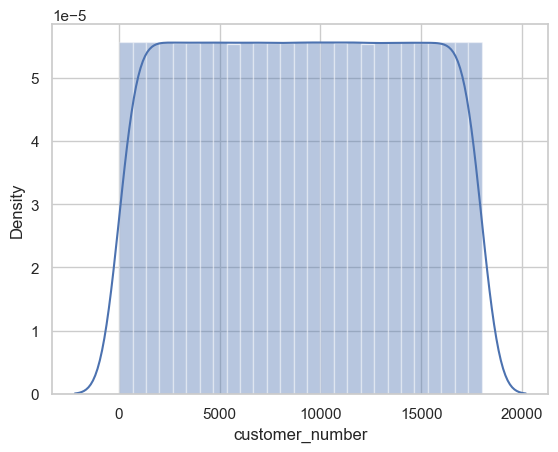

C:\Users\anasa\AppData\Local\Temp\ipykernel_22740\557243024.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




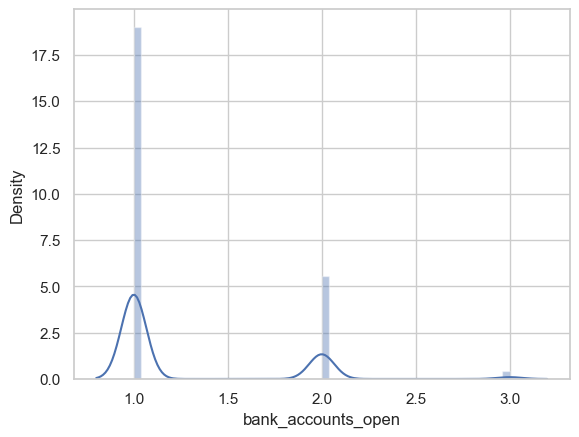

C:\Users\anasa\AppData\Local\Temp\ipykernel_22740\557243024.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




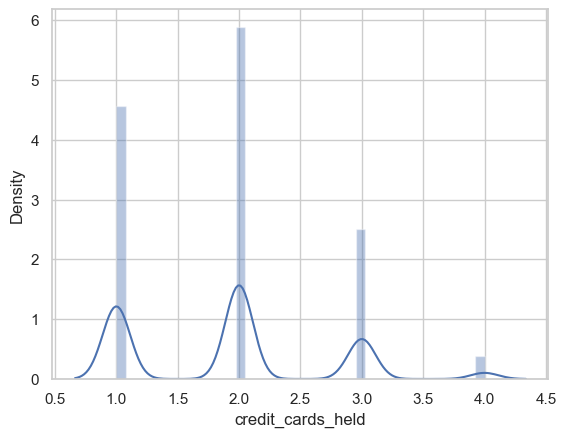

C:\Users\anasa\AppData\Local\Temp\ipykernel_22740\557243024.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




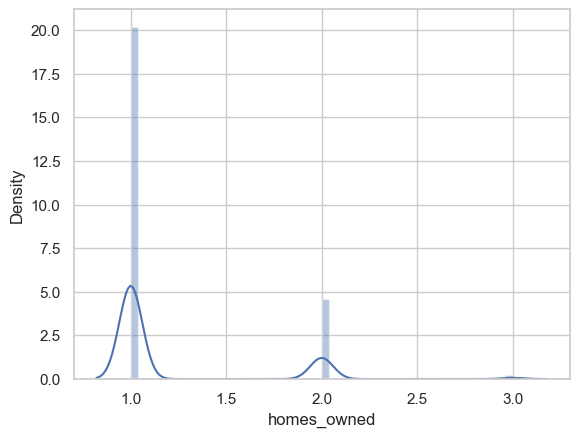

C:\Users\anasa\AppData\Local\Temp\ipykernel_22740\557243024.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




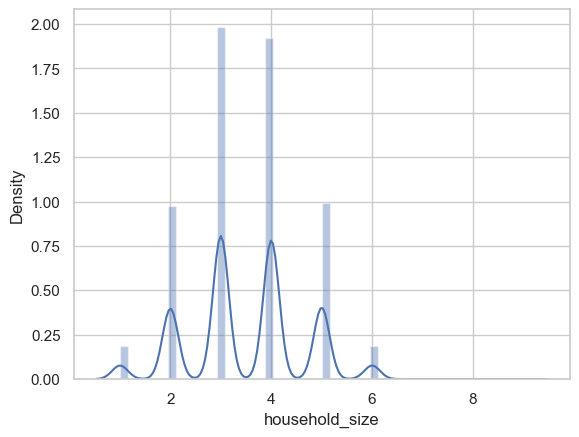

C:\Users\anasa\AppData\Local\Temp\ipykernel_22740\557243024.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




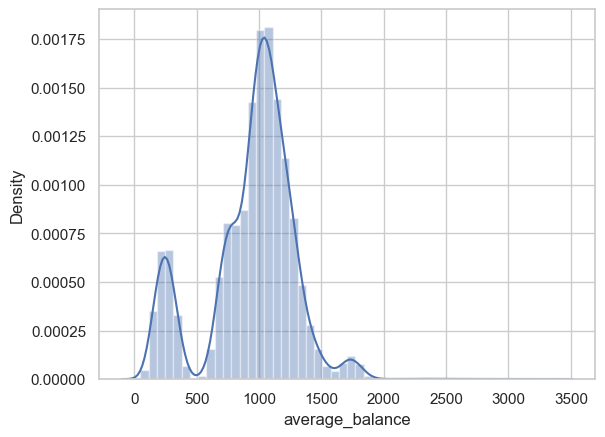

C:\Users\anasa\AppData\Local\Temp\ipykernel_22740\557243024.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




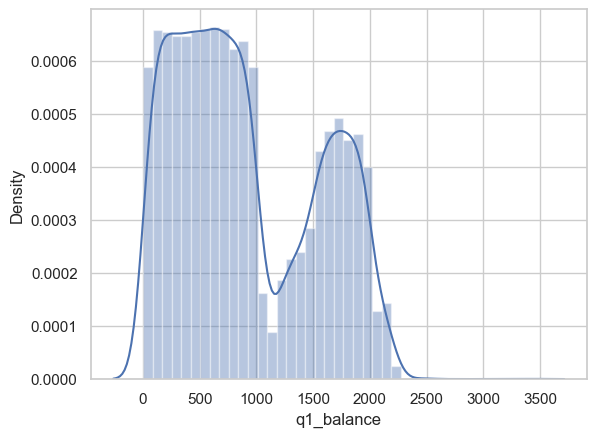

C:\Users\anasa\AppData\Local\Temp\ipykernel_22740\557243024.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




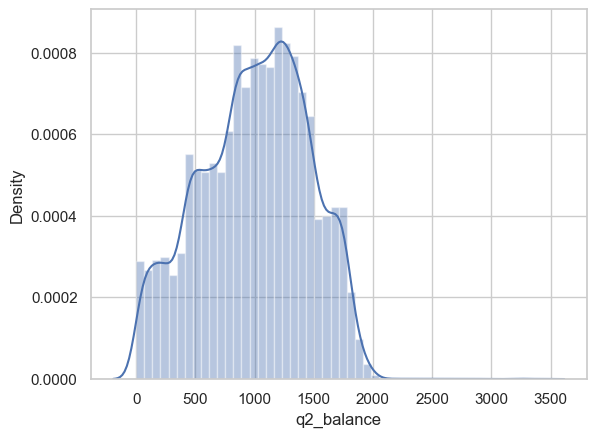

C:\Users\anasa\AppData\Local\Temp\ipykernel_22740\557243024.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




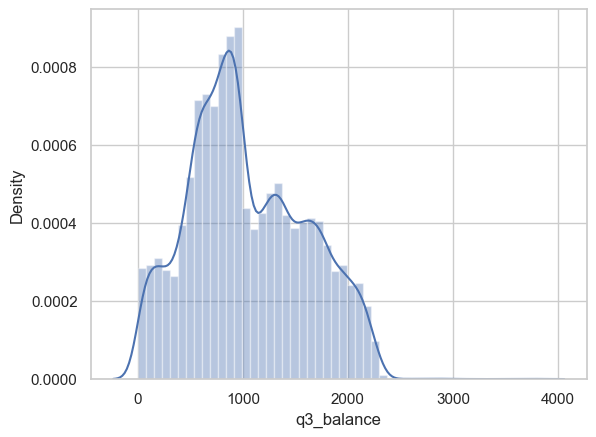

C:\Users\anasa\AppData\Local\Temp\ipykernel_22740\557243024.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




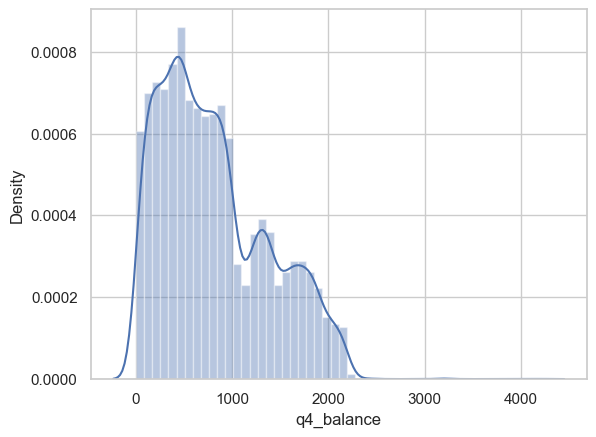

In [175]:
# Independent variables: numerical  
for col in numericals0.columns:
    sns.distplot(numericals0[col])
    plt.show()

Conclusiones:

- Observamos que solo un 5.68% de los clientes acepta este tipo de productos, mientras que un 94.3% los rechaza, reflejando un mercado limitado entre nuestros clientes.
- Aunque los clientes prefieren los "air miles" como método de recompensa, los "cash back" y "points"  son casi igual de populares.
- Cerca de la mitad de los clientes prefieren letra y la otra mitad carta postal. 
- En su mayoria los clientes no tienen proteccion de sobregiro (protegerse de los inconvenientes que conllevan las transacciones rechazadas o los cheques devueltos  por no tener fondos)
 - La distribución de la renta de los clientes indica que la mitad de ellos tienen ingresos medios, lo que representa el doble de clientes en comparación con aquellos con ingresos bajos o altos (quienes están uniformemente distribuidos entre sí).
- La calificación crediticia está distribuida de manera equitativa entre los clientes, lo que sugiere que casi todos presentan un riesgo de impago similar.
- Se observa casi el doble de clientes con vivienda propia en comparación con aquellos que no poseen una vivienda.

# CODIFICACIÓN:

In [176]:
# Introduciomos libreria e inicializamos el labal encoder
# Iteramos para que en cada columna categorica, cree una nueva columna llamada encoded_nombre de la columna original y que se codifique todo en la misma columna
label_encoder = LabelEncoder()
for column in categoricals0.columns.tolist():
     categoricals0[f'encoded_{column}'] = label_encoder.fit_transform(categoricals0[column])   

# ESTUDIO Y TRATAMIENTO DE OUTLIERS:

In [177]:
# Aplicamos el analisis de desviacion estandard a las variables numericas del df para el estudio de outliers

# Calculamos la media y la desviación estándar para cada columna
medias = numericals0.mean()
desviaciones_estandar = numericals0.std()

# Establecemos un umbral (por ejemplo, 3 desviaciones estándar de la media)
umbral_superior = medias + 3 * desviaciones_estandar
umbral_inferior = medias - 3 * desviaciones_estandar

# Iteramos sobre cada columna para encontrar los valores atípicos:
valores_atipicos_por_columna = {}
for columna in numericals0.columns:
    valores_atipicos_por_columna[columna] = numericals0[(numericals0[columna] > umbral_superior[columna]) | (numericals0[columna] < umbral_inferior[columna])]

# Sacamos los valores atípicos por cada columna
for columna, valores_atipicos in valores_atipicos_por_columna.items():
    print(f"Valores atípicos en la columna '{columna}':")
    print(valores_atipicos)

Valores atípicos en la columna 'customer_number':
Empty DataFrame
Columns: [customer_number, bank_accounts_open, credit_cards_held, homes_owned, household_size, average_balance, q1_balance, q2_balance, q3_balance, q4_balance]
Index: []
Valores atípicos en la columna 'bank_accounts_open':
       customer_number  bank_accounts_open  credit_cards_held  homes_owned  \
33                  34                   3                  1            1   
53                  54                   3                  1            1   
71                  72                   3                  2            2   
84                  85                   3                  2            1   
143                144                   3                  2            1   
...                ...                 ...                ...          ...   
17738            17739                   3                  2            1   
17741            17742                   3                  3            1   
17767    

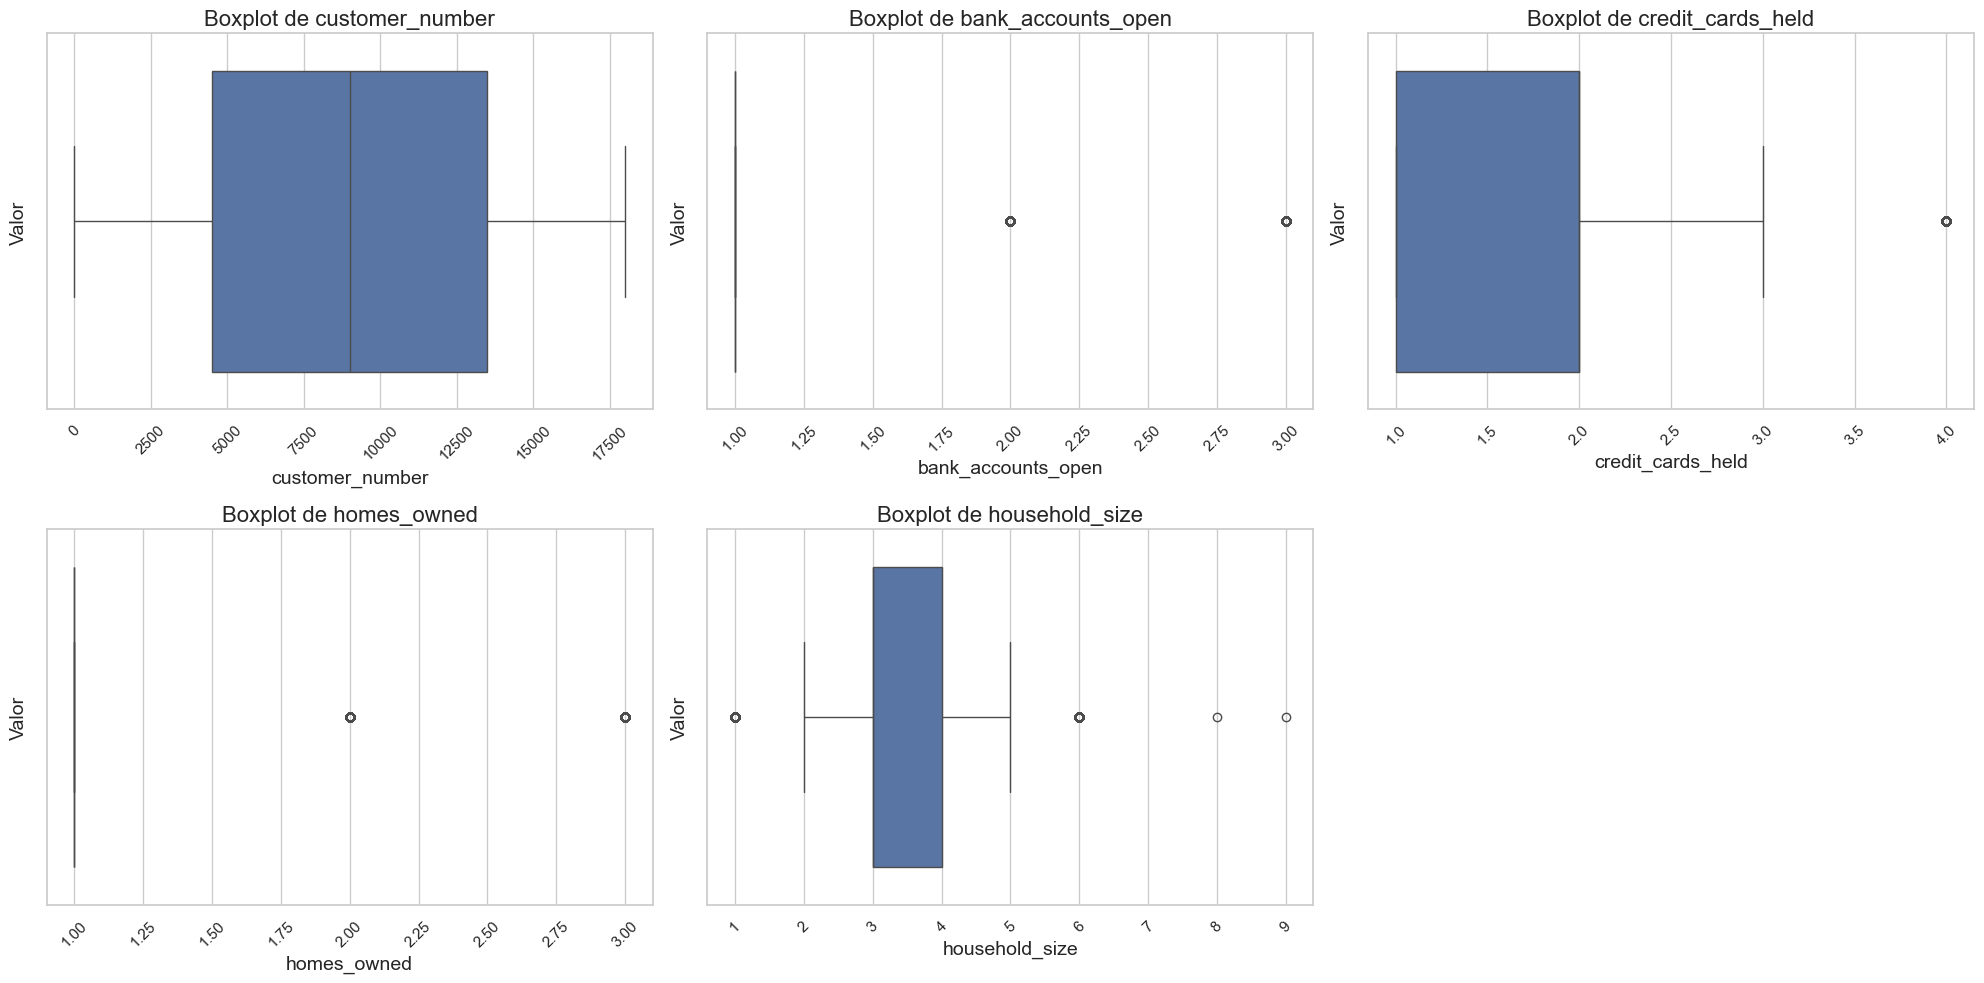

In [178]:
# Para el analisis de datos atípicos/outliers vamos a emplear el analisis grafico a traves del diagrama de caja o diagrama de caja y bigote.
# Los valores que están por encima o por debajo de los "bigotes" del diagrama de caja se consideran atípicos.

# Vamos a aplicar este método únicamente a los datos de variables numericas puesto que los codificados no tendran outliers:
# Para crear el diagrama de caja y bigotes
columnas = ['customer_number',  'bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size']

# Ajustamos el tamaño de la figura
plt.figure(figsize=(20, 10))

# Iteramos sobre cada columna en la lista columnas y creamos un boxplot separado
for i, columna in enumerate(columnas, 1):
    plt.subplot(2, 3, i)  # Filas: 2, Columnas: 3, Índice de la subfigura: i
    sns.boxplot(x=numericals0[columna])
    plt.title(f'Boxplot de {columna}', fontsize=16)
    plt.xlabel(columna, fontsize=14)
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
    plt.ylabel('Valor', fontsize=14)

plt.tight_layout()  # Ajustar el diseño de los subplots
plt.show()

In [179]:
# Eliminamos datos atípicos de DF (numericals tendrá valores atipicos y numericals1 ya no tiene en cuanta tipicos):

# PAra eliminar atipicos vamos a considerar la siguiente condicion
# &= asegura que solo las filas que cumplen todas las condiciones (no son outliers en ninguna columna) se mantengan.
condition = True
for columna in numericals0.columns:
    condition &= (numericals0[columna] <= umbral_superior[columna]) & (numericals0[columna] >= umbral_inferior[columna])

numericals1 = numericals0[condition]

print("DataFrame original:")
print(numericals0)

# El nuevo numericals1 es como numericals pero ya sin atípicos:
print("\nDataFrame después de eliminar los valores atípicos:")
print(numericals1)

DataFrame original:
       customer_number  bank_accounts_open  credit_cards_held  homes_owned  \
0                    1                   1                  2            1   
1                    2                   1                  2            2   
2                    3                   2                  2            1   
3                    4                   2                  1            1   
4                    5                   1                  2            1   
...                ...                 ...                ...          ...   
17995            17996                   1                  1            1   
17996            17997                   1                  3            1   
17997            17998                   1                  2            1   
17998            17999                   1                  4            2   
17999            18000                   2                  2            1   

       household_size  average_balance  q1_

# NORMALIZACIÓN DE DATOS:

In [180]:
# Normalización de variables continuas:
# Existen 2 metodos de normalización: Min-Max y la normalización Z-score la eleccion de metodo depende de tus datos:
# Normalización Min-Max:
#Ventajas:
    # - Conserva la escala relativa de los datos originales (útil si la interpretación de los valores en su escala original) 
#Desventajas:
    # - Sensible a valores atípicos: si tus datos son extremadamente grandes/pequeños, la Min-Max puede distorsionar la distribución de los datos.
    # - No estandariza datos--> podría ser inadecuada si usas sensibles a la escala, como los modelos de regresión lineal.
# Normalización Z-score:
#Ventajas:
    # - Estandariza los datos para media=0 y desviación estándar=1, lo que puede ser útil para algoritmos sensibles a la escala y para comparar variables con diferentes unidades o escalas.
    # - Menos sensible a valores atípicos Vs. la normalización Min-Max, ya que utiliza la media y la desviación estándar.
# Desventajas:
    # - No conserva la escala relativa de los datos originales-->dificulta la interpretación de los valores normalizados si es importante mantener la interpretación en la escala original.
    
# Crea el objeto StandardScaler
scaler = StandardScaler()

# Ajusta y transforma los datos numéricos
scaled_numericals = scaler.fit_transform(numericals1)

# Crea el DataFrame con los datos escalados usando los nombres de las columnas originales
numericals1=pd.DataFrame(scaled_numericals, columns=df.select_dtypes(include=["int64", "float64"]).columns)
scaled_numericals

array([[-1.73295662, -0.54143504,  0.12093215, ..., -0.26672129,
         0.09891721,  0.34757222],
       [-1.7327643 , -0.54143504,  0.12093215, ..., -1.96095158,
        -1.74463234, -0.79590903],
       [-1.73257198,  1.84694364,  0.12093215, ..., -1.42038005,
        -1.62317922, -1.01885191],
       ...,
       [ 1.72823372, -0.54143504,  0.12093215, ..., -0.50844027,
         0.2348722 ,  1.23215205],
       [ 1.72842604, -0.54143504,  2.63086628, ..., -0.0337921 ,
        -0.3180114 ,  1.44970115],
       [ 1.72861836,  1.84694364,  0.12093215, ...,  0.83419877,
         1.69956054, -0.36980045]])

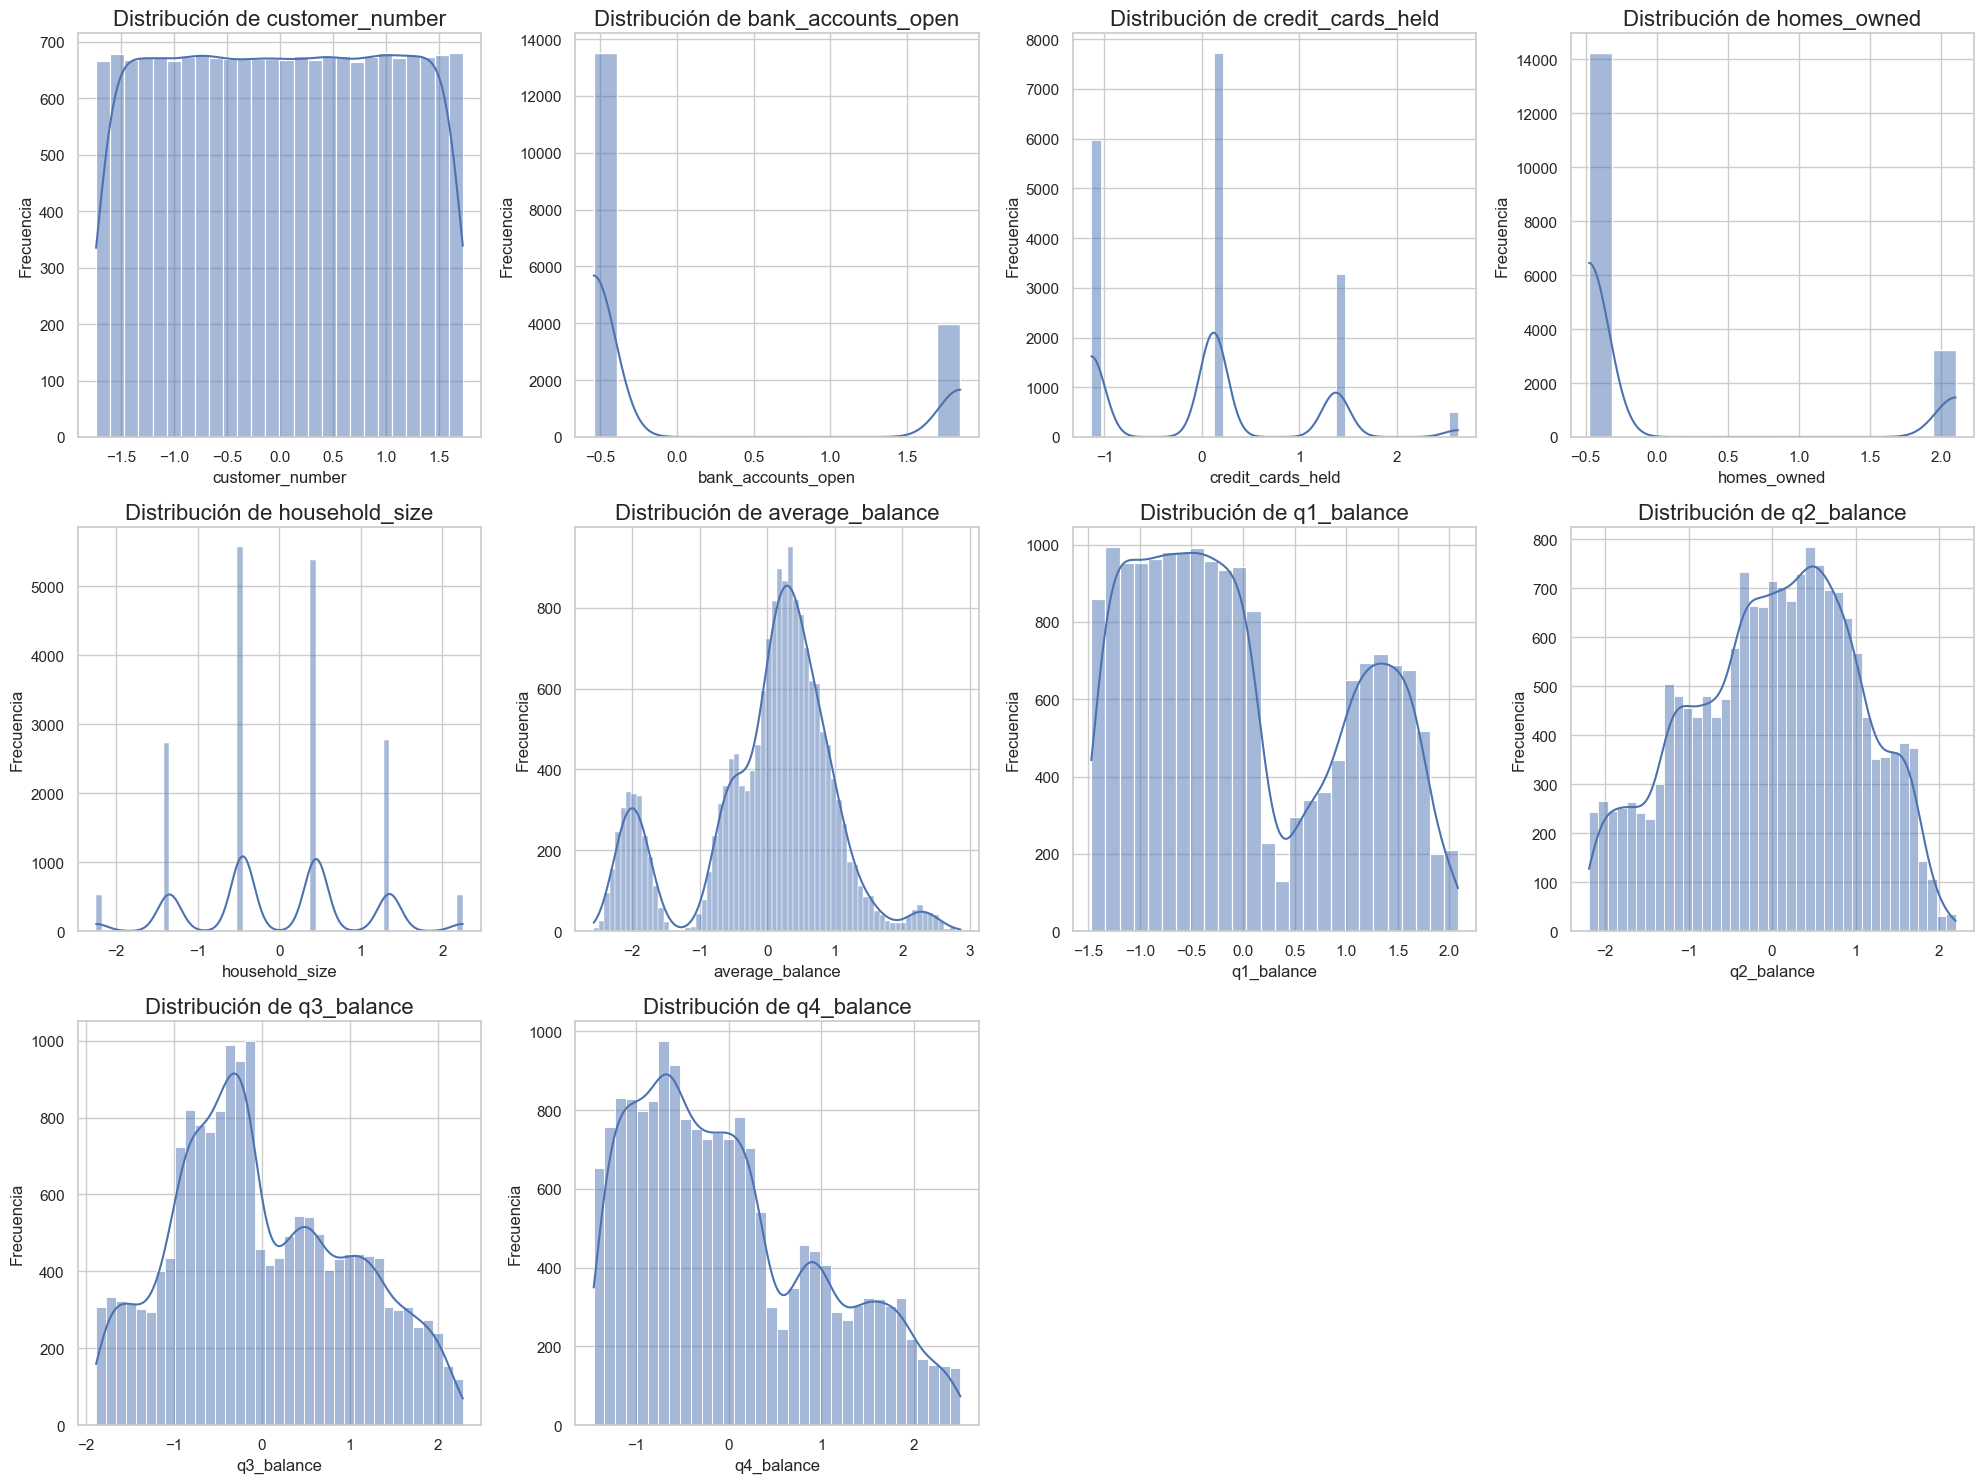

In [181]:
# Convertir el ndarray a DataFrame
scaled_numericals = pd.DataFrame(scaled_numericals, columns=numericals1.columns)

# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura de múltiples subplots para histogramas
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

# Aplanar los ejes para facilitar la iteración
axes = axes.flatten()

# Iterar sobre las columnas del DataFrame escalado
for i, column in enumerate(scaled_numericals.columns):
    sns.histplot(scaled_numericals[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {column}', fontsize=16)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')

# Eliminar los ejes adicionales si hay menos gráficos que subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [182]:
# Ahora fusionamos los df de numericals (normalizados) y categoricals (codificados) en un nuevo df para que los codificados y numericos aparezcan juntos:
df_concat = pd.concat([categoricals0, numericals1], axis=1)
df_concat

offer_accepted     reward mailer_type income_level overdraft_protection  \
0                 No  Air Miles      Letter         High                   No   
1                 No  Air Miles      Letter       Medium                   No   
2                 No  Air Miles    Postcard         High                   No   
3                 No  Air Miles      Letter       Medium                   No   
4                 No  Air Miles      Letter       Medium                   No   
...              ...        ...         ...          ...                  ...   
14666            NaN        NaN         NaN          NaN                  NaN   
14698            NaN        NaN         NaN          NaN                  NaN   
15707            NaN        NaN         NaN          NaN                  NaN   
15933            NaN        NaN         NaN          NaN                  NaN   
17104            NaN        NaN         NaN          NaN                  NaN   

      credit_rating own_your_home  encoded_offer_accepted  encoded_reward  \
0              High            No                     0.0             0.0   
1            Medium           Yes                     0.0             0.0   
2            Medium           Yes                     0.0             0.0   
3              High            No                     0.0             0.0   
4            Medium           Yes                     0.0             0.0   
...             ...           ...                     ...             ...   
14666           NaN           NaN                     NaN             NaN   
14698           NaN           NaN                     NaN             NaN   
15707           NaN           NaN                     NaN             NaN   
15933           NaN           NaN                     NaN             NaN   
17104           NaN           NaN                     NaN             NaN   

       encoded_mailer_type  ...  customer_number  bank_accounts_open  \
0                      0.0  ...        -1.732957           -0.541435   
1                      0.0  ...        -1.732764           -0.541435   
2                      1.0  ...        -1.732572            1.846944   
3                      0.0  ...        -1.732380            1.846944   
4                      0.0  ...        -1.732187           -0.541435   
...                    ...  ...              ...                 ...   
14666                  NaN  ...         1.173582            1.846944   
14698                  NaN  ...         1.179736           -0.541435   
15707                  NaN  ...         1.378018           -0.541435   
15933                  NaN  ...         1.423214            1.846944   
17104                  NaN  ...         1.653421           -0.541435   

       credit_cards_held  homes_owned  household_size  average_balance  \
0               0.120932    -0.476266        0.451446         0.637150   
1               0.120932     2.099666        1.350327        -2.279895   
2               0.120932    -0.476266       -1.346317        -1.907889   
3              -1.134035    -0.476266        0.451446         0.804804   
4               0.120932    -0.476266        2.249209         0.781779   
...                  ...          ...             ...              ...   
14666           0.120932    -0.476266       -0.447436         1.296975   
14698           1.375899     2.099666       -0.447436        -0.120534   
15707           2.630866    -0.476266        0.451446         0.052877   
15933           0.120932    -0.476266        1.350327         0.298962   
17104           0.120932    -0.476266        0.451446         0.509070   

       q1_balance  q2_balance  q3_balance  q4_balance  
0        1.226282   -0.266721    0.098917    0.347572  
1       -1.407310   -1.960952   -1.744632   -0.795909  
2       -0.877360   -1.420380   -1.623179   -1.018852  
3        1.079253    1.673623    0.142423   -0.700619  
4        1.987277    0.788052   -0.105922   -0.797707  
...           ... 

In [183]:
df_concat.shape 
# Observamos que tras la codificacion y la fusion de data frames la forma del DF es correcta y no hemos perdidio ningun dato por el camino

(18000, 24)

In [184]:
# Estudio de relevancia de variables:
    # Analisis de multicolinearidad/datos redundantes:
        # Matriz de correlación
        # VIF

In [185]:
# Estudio de relevancia de variables:
    # Analisis de multicolinearidad/datos redundantes:
        # Matriz de correlación
        # VIF
        
# Matriz de correlación:
correl_matrix=numericals1.corr()
correl_matrix

customer_number  bank_accounts_open  credit_cards_held  \
customer_number            1.000000            0.001320          -0.008773   
bank_accounts_open         0.001320            1.000000          -0.004631   
credit_cards_held         -0.008773           -0.004631           1.000000   
homes_owned                0.001274            0.007070          -0.000824   
household_size             0.008939            0.005628          -0.003565   
average_balance            0.008593           -0.004955          -0.002743   
q1_balance                 0.013792           -0.003749          -0.008498   
q2_balance                 0.012298           -0.012096          -0.005842   
q3_balance                 0.004938           -0.002946          -0.007525   
q4_balance                -0.008836            0.004610           0.014847   

                    homes_owned  household_size  average_balance  q1_balance  \
customer_number        0.001274        0.008939         0.008593    0.013792   
bank_accounts_open     0.007070        0.005628        -0.004955   -0.003749   
credit_cards_held     -0.000824       -0.003565        -0.002743   -0.008498   
homes_owned            1.000000        0.004994         0.015064    0.016711   
household_size         0.004994        1.000000        -0.001226   -0.005658   
average_balance        0.015064       -0.001226         1.000000    0.478586   
q1_balance             0.016711       -0.005658         0.478586    1.000000   
q2_balance             0.008861       -0.007361         0.798320    0.480974   
q3_balance             0.004659        0.006413         0.750545   -0.067104   
q4_balance             0.007174        0.002895         0.568537   -0.243919   

                    q2_balance  q3_balance  q4_balance  
customer_number       0.012298    0.004938   -0.008836  
bank_accounts_open   -0.012096   -0.002946    0.004610  
credit_cards_held    -0.005842   -0.007525    0.014847  
homes_owned           0.008861    0.004659    0.007174  
household_size       -0.007361    0.006413    0.002895  
average_balance       0.798320    0.750545    0.568537  
q1_balance            0.480974   -0.067104   -0.243919  
q2_balance            1.000000    0.482503    0.162784  
q3_balance            0.482503    1.000000    0.563442  
q4_balance            0.162784    0.563442    1.000000

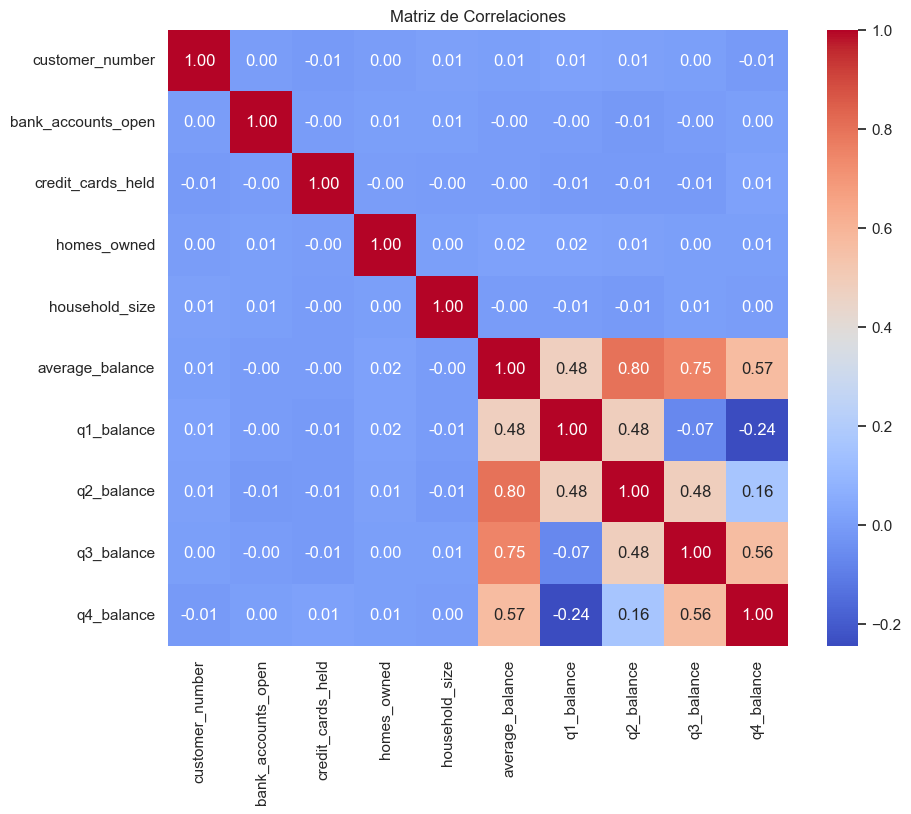

In [186]:
# Crear un mapa de calor con Seaborn
plt.figure(figsize=(10, 8))  # Define el tamaño de la figura
sns.heatmap(correl_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlaciones')
plt.show()

De la matriz de correlaciones observamos que las correlaciones mas elevadas estan entre average_balance y el balance de los cuatro trimestres.
Sin embargo, es notablemente mas alta en los casos de q2 y q3 con average_balance. Ante esto podriamos considerar varias soluciones:
    - Eliminar average_balance y quedarno con lo cuatro valores de balance por trimestre
    - Eliminar q2 y q3 ya que estan contenidos en average_balance y sería redundante. Sin embargo tampoco tendría sentido mantener el los valores de algunos trimestres y de otros no.
    
Para complementar este análisis vamos a considerar otros metodos de estudio de multicolinearidad para ver si nos llevan a conclusiones mas concretas.

In [187]:
# VIF:
# Ahora intentamos analizar coliarity con VIF:

# Añadir una columna constante al DataFrame para el término de intercepción
x = add_constant(numericals1)
# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = numericals1.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(10)]

# Imprimir el DataFrame con los resultados del VIF
print(vif_data)

             Variable       VIF
0     customer_number  1.000000
1  bank_accounts_open  1.000511
2   credit_cards_held  1.000323
3         homes_owned  1.000720
4      household_size  1.000500
5     average_balance  1.000341
6          q1_balance       inf
7          q2_balance       inf
8          q3_balance       inf
9          q4_balance       inf


c:\Users\anasa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



Analizando matriz de correlecaciones y VIF (Factor de Inflación de la Varianza) para evaluar la multicolinealidad entre las variables independiente, observamos multicolinealidad (por una alta correlación entre variables independientes) entre varias variables.

En particular, destaca VIF de infinito (inf) de balance de todos los trimestres, indicando que estas variables están perfectamente correlacionadas entre si. Esto se debe a que cada una de ellas es una combinación lineal exacta de otras variables en el modelo (average balance es la media entre los valores de balance de cada trimestre).

Si bien la alta correlación entre estas variables puede ser esperada ya que es normal que las variables que representan la evolución del mismo fenómeno a lo largo del tiempo estén altamente correlacionadas, un VIF infinito puede causar problemas en el análisis de regresión, como inestabilidad en la estimación de los coeficientes y dificultades en la interpretación del modelo.

Cuando el VIF es infinito, se debe eliminar una de las variables altamente correlacionadas del modelo para resolver el problema de multicolinealidad. 

Sin embargo, aunque están correlacionadas aún aportan información muy relevante. Para evitar la multicolinearidad y a la vez no perder información podriamos combinarlas en una sola variable que refleje la información de los 4 trimestres. 

Para ello, vamos a mantener la media (average_balance) y vamos a calcular la suma de los balances de los cuatro trimestres:
    - La suma:puede ser más fácil de interpretar directamente y se verá afectada por valores extremos
    - La media: puede ser útil para comprender la tendencia general a lo largo del tiempo y tendrá menor sesibilidad a outliers. 
--> Ojo la media ya existe, no la creamos doble!

In [188]:
# Creamos la nueva variable y eliminamos los datos trimestrales desglosados:
# Creamos una columna 'total_balance' que sea la suma de 'q1_balance', 'q2_balance', 'q3_balance' y 'q4_balance':
df_concat['total_balance'] = df_concat['q1_balance'] + df_concat['q2_balance'] + df_concat['q3_balance'] + df_concat['q4_balance']

# Creamos una columna 'average_quarterly_balance' que sea la media de'q1_balance', 'q2_balance', 'q3_balance' y 'q4_balance':
# df['average_quarterly_balance'] = df[['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']].mean(axis=1)
# Ojo ya hay una columna que es average_balance y tiene los mismos resultados asi que no tiene sentido añadir otra igual

# Crear un nuevo DataFrame con todas las columnas originales ya codificadas y sin los balances de cada trimestre:
# Pero que tengas las nuevas variables creadas:
df_concat1 = df_concat[['encoded_offer_accepted', 'encoded_reward', 'encoded_mailer_type', 'encoded_income_level', 'encoded_overdraft_protection', 'encoded_credit_rating', 'encoded_own_your_home', 'customer_number', 'bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size',  'average_balance', 'total_balance']]

# Mostrar los primeros registros del nuevo DataFrame para verificar
print(df_concat1.head())

   encoded_offer_accepted  encoded_reward  encoded_mailer_type  \
0                     0.0             0.0                  0.0   
1                     0.0             0.0                  0.0   
2                     0.0             0.0                  1.0   
3                     0.0             0.0                  0.0   
4                     0.0             0.0                  0.0   

   encoded_income_level  encoded_overdraft_protection  encoded_credit_rating  \
0                   0.0                           0.0                    0.0   
1                   2.0                           0.0                    2.0   
2                   0.0                           0.0                    2.0   
3                   2.0                           0.0                    0.0   
4                   2.0                           0.0                    2.0   

   encoded_own_your_home  customer_number  bank_accounts_open  \
0                    0.0        -1.732957           -0.54

In [189]:
numericals1 = df_concat1.select_dtypes(include=['int', 'float'])
numericals1

encoded_offer_accepted  encoded_reward  encoded_mailer_type  \
0                         0.0             0.0                  0.0   
1                         0.0             0.0                  0.0   
2                         0.0             0.0                  1.0   
3                         0.0             0.0                  0.0   
4                         0.0             0.0                  0.0   
...                       ...             ...                  ...   
14666                     NaN             NaN                  NaN   
14698                     NaN             NaN                  NaN   
15707                     NaN             NaN                  NaN   
15933                     NaN             NaN                  NaN   
17104                     NaN             NaN                  NaN   

       encoded_income_level  encoded_overdraft_protection  \
0                       0.0                           0.0   
1                       2.0                           0.0   
2                       0.0                           0.0   
3                       2.0                           0.0   
4                       2.0                           0.0   
...                     ...                           ...   
14666                   NaN                           NaN   
14698                   NaN                           NaN   
15707                   NaN                           NaN   
15933                   NaN                           NaN   
17104                   NaN                           NaN   

       encoded_credit_rating  encoded_own_your_home  customer_number  \
0                        0.0                    0.0        -1.732957   
1                        2.0                    1.0        -1.732764   
2                        2.0                    1.0        -1.732572   
3                        0.0                    0.0        -1.732380   
4                        2.0                    1.0        -1.732187   
...                      ...                    ...              ...   
14666                    NaN                    NaN         1.173582   
14698                    NaN                    NaN         1.179736   
15707                    NaN                    NaN         1.378018   
15933                    NaN                    NaN         1.423214   
17104                    NaN                    NaN         1.653421   

       bank_accounts_open  credit_cards_held  homes_owned  household_size  \
0               -0.541435           0.120932    -0.476266        0.451446   
1               -0.541435           0.120932     2.099666        1.350327   
2                1.846944           0.120932    -0.476266       -1.346317   
3                1.846944          -1.134035    -0.476266        0.451446   
4               -0.541435           0.120932    -0.476266        2.249209   
...                   ...                ...          ...             ...   
14666            1.846944           0.120932    -0.476266       -0.447436   
14698           -0.541435           1.375899     2.099666       -0.447436   
15707           -0.541435           2.630866    -0.476266        0.451446   
15933            1.846944           0.120932    -0.476266        1.350327   
17104           -0.541435           0.120932    -0.476266        0.451446   

       average_balance  total_balance  
0             0.637150       1.406050  
1            -2.279895      -5.908803  
2            -1.907889      -4.939772  
3             0.804804       2.194680  
4             0.781779       1.871701  
...                ...            ...  
14666         1.296975       3.149143  
14698        -0.120534      -0.331685  
15707         0.052877       0.194597  
15933         0.298962       1.157733  
17104         0.509070       1.318961  

[18000 rows x 14 columns]

In [190]:
for col in categoricals0.columns:
    fig = px.histogram(categoricals0, x=col, color="encoded_offer_accepted")
    fig.show()

- La frecuencia de offer_accepted es mayor para clientes que prefieren el reward en forma de Airm miles
- Mayor porcentaje de clientes aceptan oferta cuando solicitan comunicacion via tarjeta postal
- Logicamente, es mas habitual que se acepten ofertas de credito cuando la renta es media o baja
- Son los clientes que no solicitan proteccion de sobregiro los que parecen aceptar mas oferta de credito
- Notable mayor contratacion de estos productos en clientes de baja calificacion crediticia
- Si bien la relacion es menor, parece que los clientes con casa propia suelen consumir mas estos productos.

Despues de este analisis inicial y de la limpieza, transformación y normalizacion de datos, podemos pasar a la modelización. 
Vamos a usar una regresión logistica ya que este metodo se usa para predecir un resultado con dos posibles alternativas, en nuestro caso, la aceptación o rechazo de un credito de acuerdo a otras variables independientes.

In [191]:
# Comprobamos que en el nuevo df no queda ningun nan
conteo_nan_por_columna = df_concat1.isna().sum()

# Muestra el conteo de NaN por columna
print(conteo_nan_por_columna)

encoded_offer_accepted           24
encoded_reward                   24
encoded_mailer_type              24
encoded_income_level             24
encoded_overdraft_protection     24
encoded_credit_rating            24
encoded_own_your_home            24
customer_number                 514
bank_accounts_open              514
credit_cards_held               514
homes_owned                     514
household_size                  514
average_balance                 514
total_balance                   514
dtype: int64


# MODELIZACIÓN:

In [192]:
# Eliminamos los nan que pudieran quedar:
df_concat1=df_concat1[df_concat1.notna().all(axis=1)]
df_concat1

encoded_offer_accepted  encoded_reward  encoded_mailer_type  \
0                         0.0             0.0                  0.0   
1                         0.0             0.0                  0.0   
2                         0.0             0.0                  1.0   
3                         0.0             0.0                  0.0   
4                         0.0             0.0                  0.0   
...                       ...             ...                  ...   
17481                     0.0             0.0                  0.0   
17482                     0.0             2.0                  1.0   
17483                     0.0             1.0                  0.0   
17484                     0.0             2.0                  1.0   
17485                     0.0             2.0                  1.0   

       encoded_income_level  encoded_overdraft_protection  \
0                       0.0                           0.0   
1                       2.0                           0.0   
2                       0.0                           0.0   
3                       2.0                           0.0   
4                       2.0                           0.0   
...                     ...                           ...   
17481                   1.0                           0.0   
17482                   2.0                           0.0   
17483                   2.0                           0.0   
17484                   1.0                           0.0   
17485                   2.0                           0.0   

       encoded_credit_rating  encoded_own_your_home  customer_number  \
0                        0.0                    0.0        -1.732957   
1                        2.0                    1.0        -1.732764   
2                        2.0                    1.0        -1.732572   
3                        0.0                    0.0        -1.732380   
4                        2.0                    1.0        -1.732187   
...                      ...                    ...              ...   
17481                    0.0                    1.0         1.727849   
17482                    2.0                    1.0         1.728041   
17483                    1.0                    1.0         1.728234   
17484                    0.0                    0.0         1.728426   
17485                    1.0                    1.0         1.728618   

       bank_accounts_open  credit_cards_held  homes_owned  household_size  \
0               -0.541435           0.120932    -0.476266        0.451446   
1               -0.541435           0.120932     2.099666        1.350327   
2                1.846944           0.120932    -0.476266       -1.346317   
3                1.846944          -1.134035    -0.476266        0.451446   
4               -0.541435           0.120932    -0.476266        2.249209   
...                   ...                ...          ...             ...   
17481           -0.541435          -1.134035    -0.476266        1.350327   
17482           -0.541435           1.375899    -0.476266       -0.447436   
17483           -0.541435           0.120932    -0.476266        0.451446   
17484           -0.541435           2.630866     2.099666       -1.346317   
17485            1.846944           0.120932    -0.476266       -0.447436   

       average_balance  total_balance  
0             0.637150       1.406050  
1            -2.279895      -5.908803  
2            -1.907889      -4.939772  
3             0.804804       2.194680  
4             0.781779       1.871701  
...                ...            ...  
17481        -2.221612      -5.797331  
17482        -0.255809      -0.677433  
17483         0.425603       0.971475  
17484         0.238520       0.639004  
17485         0.335659       1.121797  

[17462 rows x 14 columns]

In [193]:
# Definimos las variables independientes (X) y la variable objetivo/dependiente (y)
X = df_concat1.drop('encoded_offer_accepted', axis=1)  # Todas las columnas excepto la variable objetivo
y = df_concat1['encoded_offer_accepted']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba (lo hacemos como habitualmente, al 80% -20%):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
# Inicializar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [195]:
# Podemos ahora valorar la precisón del modleo creado:
# Predecir los valores para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.82%


In [196]:
set(list(y_pred))

{0.0}

In [197]:
# En todo caso analizamos los coeficientes para opder considerar cuales de estas variables son mas relevantes en la decisión:
coefficients = model.coef_[0]
feature_names = X.columns

Parece que al considerar todas las variables menos y_pred todos las predicciones llevarian al rechazo del credito.
por ello podemos considerar reducir el numero de variables independientes.

In [198]:
# En todo caso analizamos los coeficientes para opder considerar cuales de estas variables son mas relevantes en la decisión:
coefficients = model.coef_[0]
feature_names = X.columns

In [199]:
# Crear un DataFrame para visualizar los coeficientes
coefficients_df_concat1 = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print("Coeficientes del modelo:")
print(coefficients_df_concat1)

Coeficientes del modelo:
                         Feature  Coefficient
0                 encoded_reward    -0.117927
1            encoded_mailer_type     0.932899
2           encoded_income_level     0.071732
3   encoded_overdraft_protection    -0.056216
4          encoded_credit_rating     0.248435
5          encoded_own_your_home    -0.026099
6                customer_number    -0.023068
7             bank_accounts_open     0.048412
8              credit_cards_held     0.003997
9                    homes_owned    -0.010742
10                household_size     0.059282
11               average_balance    -0.005830
12                 total_balance    -0.017255


INTERPRETACIÓN DE LOS COEFICIENTES:

- Encoded_reward (-0.163505), Encoded_own_your_home: (-0.029796), Customer_number: (-0.004771), Bank_accounts_open: (-0.043467), Average_balance: (-0.433469)  --> estas variables afectan negativamente a la aceptacion del credito. 

- Encoded_mailer_type: (0.888677), Encoded_income_level: (0.077881), Encoded_overdraft_protection: (0.016103), Encoded_credit_rating: (0.254410), Credit_cards_held: (0.009912), Homes_owned: (0.019220), Household_size: (0.015077), Total_balance: (0.156642)  --> estas variables afectan positivamente a la aceptacion del credito.

- Sin embargo, parece que algunas de las ultimas podrian no ser muy relevantes. Podemos volver a hacer el mismo modelo con solo algunas variables: 
        - Bank_accounts_open
        - Average_balance
        - Encoded_income_level
        - Encoded_overdraft_protection
        - Encoded_credit_rating
        - Credit_cards_held
        - Homes_owned
        - Household_size
        - Total_balance    

In [200]:
print(df_concat1.columns) #Solo para tener la lista de variables de DF

Index(['encoded_offer_accepted', 'encoded_reward', 'encoded_mailer_type',
       'encoded_income_level', 'encoded_overdraft_protection',
       'encoded_credit_rating', 'encoded_own_your_home', 'customer_number',
       'bank_accounts_open', 'credit_cards_held', 'homes_owned',
       'household_size', 'average_balance', 'total_balance'],
      dtype='object')


In [201]:
# Lista de columnas que deseas seleccionar:
columnas_seleccionadas0 = ["bank_accounts_open", "average_balance", "encoded_income_level", "encoded_overdraft_protection", "encoded_credit_rating", "credit_cards_held", "homes_owned", "household_size","total_balance", "encoded_offer_accepted"]

# Seleccionar las columnas del DataFrame original
df_reducido0 = df_concat1[columnas_seleccionadas0]

# Definir las variables independientes (X) y la variable objetivo/dependiente (y)
X0 = df_reducido0.drop(columns=['encoded_offer_accepted'])  # Todas las columnas excepto la variable objetivo
y0 = df_reducido0['encoded_offer_accepted']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba (lo hacemos como habitualmente, al 80% -20%):
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size=0.2, random_state=42)

In [202]:
# Inicializar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
model.fit(X_train0, y_train0)

LogisticRegression(max_iter=1000)

In [203]:
# Podemos ahora valorar la precisón del modleo creado:
# Predecir los valores para el conjunto de prueba
y_pred0 = model.predict(X_test0)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test0, y_pred0)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.82%


Podría ser un error que el modelo tenga un 100% de accuracy??

In [204]:
set(list(y_pred0))

{0.0}

In [205]:
# Convierte y_pred en una serie de pandas
y_pred_series = pd.Series(y_pred0)

# Calcula el conteo de cada valor en y_pred
conteo_valores0 = y_pred_series.value_counts()

# Imprime el resultado
print(conteo_valores0)

0.0    3493
Name: count, dtype: int64


In [206]:
# Validación del modelo:
    # R2:
from sklearn.metrics import r2_score
r_cuadrado0 = r2_score(y_test0, y_pred0)

print("R cuadrado del modelo:", r_cuadrado0)
# El R cuadrado varía entre 0-1 (nula-total explicacion de la varibilidad). 
# R cuadrado no es una medida perfecta de la bondad del ajuste de un modelo. 
#Puede ser engañoso. Por lo tanto, es recomendable complementar el analisis con otras métricas de evaluación como:
#error cuadrático medio (MSE), error absoluto medio (MAE)para obtener una imagen más completa del rendimiento del modelo.

R cuadrado del modelo: -0.054649758454106356


In [207]:
# Prbamos con otra combinacion de variables explicativas mas reducida:
# Lista de columnas que deseas seleccionar
columnas_seleccionadas1 = ["average_balance", "encoded_income_level", "encoded_credit_rating", "encoded_offer_accepted"]

# Seleccionar las columnas del DataFrame original
df_reducido1 = df_concat1[columnas_seleccionadas1]

# Definir las variables independientes (X) y la variable objetivo/dependiente (y)
X1 = df_reducido1.drop(columns=['encoded_offer_accepted'])  # Todas las columnas excepto la variable objetivo
y1 = df_reducido1['encoded_offer_accepted']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba (lo hacemos como habitualmente, al 80% -20%):
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [208]:
# Inicializar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
model.fit(X_train1, y_train1)

LogisticRegression(max_iter=1000)

In [209]:
# Podemos ahora valorar la precisón del modleo creado:
# Predecir los valores para el conjunto de prueba
y_pred1 = model.predict(X_test1)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test1, y_pred1)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.82%


In [210]:
set(list(y_pred1))

{0.0}

In [211]:
# Convierte y_pred en una serie de pandas
y_pred_series = pd.Series(y_pred1)

# Calcula el conteo de cada valor en y_pred
conteo_valores1 = y_pred_series.value_counts()

# Imprime el resultado
print(conteo_valores1)

0.0    3493
Name: count, dtype: int64


# DEALING WITH DATA IMBALANCE:

Vemos que con independencia de los datos que cojamos o las variables que usemos el modelo lleva siempre al rechazo del credito. Esto puede llevar a pensar que existe un problema de Data Imbalance (común en el aprendizaje automático especialmente en tareas de clasificación). 
Este fenómeno ocurre cuando las clases no están representadas de manera uniforme en el conjunto de datos. Este desequilibrio puede llevar a varios problemas en la construcción de modelos de clasificación:

- Sesgo del modelo: Los modelos tienden a estar sesgados hacia las clases más frecuentes. Esto puede resultar en un rendimiento deficiente en las clases minoritarias, ya que el modelo tiene menos ejemplos de estas para aprender adecuadamente.
- Evaluación errónea: Las métricas de rendimiento como la precisión pueden no reflejar el verdadero rendimiento del modelo en todas las clases. Por ejemplo, un modelo podría predecir siempre la clase mayoritaria y aún así alcanzar una precisión aparentemente alta si la mayoría de los datos pertenecen a esa clase.
- Calidad predictiva: La capacidad del modelo para generalizar bien y hacer predicciones precisas en datos no vistos puede verse comprometida, especialmente para las clases minoritarias.


In [136]:
# Suponiendo que df_reducido0 es tu DataFrame con las columnas seleccionadas
columnas_seleccionadas2 = ["average_balance", "encoded_income_level", "encoded_credit_rating", "encoded_offer_accepted"]

# Seleccionar las columnas del DataFrame original
df_reducido2 = df_concat1[columnas_seleccionadas2]


# Definir las variables independientes (X) y la variable objetivo (y)
X2 = df_reducido2.drop(columns=['encoded_offer_accepted'])
y2 = df_reducido2['encoded_offer_accepted']

# Dividir los datos en entrenamiento y prueba (80%-20%)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote2, y_train_smote2 = smote.fit_resample(X_train2, y_train2)

# Verificar el balance de clases después de aplicar SMOTE
print("Distribución de clases antes de SMOTE:")
print(y_train2.value_counts())

print("Distribución de clases después de SMOTE:")
print(y_train_smote2.value_counts())

Distribución de clases antes de SMOTE:
encoded_offer_accepted
0.0    13164
1.0      805
Name: count, dtype: int64
Distribución de clases después de SMOTE:
encoded_offer_accepted
0.0    13164
1.0    13164
Name: count, dtype: int64


In [137]:
# Ahora puedes entrenar tu modelo con X_train_smote y y_train_smote
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
model.fit(X_train_smote2, y_train_smote2)

LogisticRegression(max_iter=1000)

In [138]:
# Podemos ahora valorar la precisón del modleo creado:
# Predecir los valores para el conjunto de prueba
y_pred2 = model.predict(X_test2)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test2, y_pred2)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 53.74%


In [139]:
set(list(y_pred2))

{0.0, 1.0}

In [140]:
# Convierte y_pred en una serie de pandas
y_pred_series = pd.Series(y_pred2)

# Calcula el conteo de cada valor en y_pred
conteo_valores2 = y_pred_series.value_counts()

# Imprime el resultado
print(conteo_valores2)

0.0    1856
1.0    1637
Name: count, dtype: int64


Efectivamente vemos ahora un resultado mas equilibrado de respuestas

In [141]:
# En todo caso analizamos los coeficientes para opder considerar cuales de estas variables son mas relevantes en la decisión:
coefficients = model.coef_[0]
feature_names = X2.columns

In [142]:
# Crear un DataFrame para visualizar los coeficientes
coefficients_df_concat1 = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print("Coeficientes del modelo:")
print(coefficients_df_concat1)

Coeficientes del modelo:
                 Feature  Coefficient
0        average_balance    -0.057120
1   encoded_income_level     0.076865
2  encoded_credit_rating     0.305384


De estos coeficientes podemos interpretar:
    - El balance medio afecta negativamente, es decir, cuanto mayor balance medio, menor  probabilidad de aceptacion del crédito
    - Por el contrario a medida que aumenta el nivel de renta mayor es la probabilidad de aceptacion del crédito
    - La demanda de estos creditos se incrementa con la calificacion crediticia, de forma que es mas probable su contratacion por lo clientes con mejor calificacion.
    
Tras este análisis y teniendo en cuenta una accuracy del 54%, podemos considerar incluir algunas variables más para ver si así el modelo gana robustez y precisión

In [143]:
# Suponiendo que df_reducido0 es tu DataFrame con las columnas seleccionadas
columnas_seleccionadas3 = ['encoded_offer_accepted', 'encoded_income_level', 'encoded_overdraft_protection','encoded_credit_rating', 'encoded_own_your_home', 'bank_accounts_open', 'credit_cards_held', 'homes_owned','average_balance', 'total_balance']

# Seleccionar las columnas del DataFrame original
df_reducido3 = df_concat1[columnas_seleccionadas3]


# Definir las variables independientes (X) y la variable objetivo (y)
X3 = df_reducido3.drop(columns=['encoded_offer_accepted'])
y3 = df_reducido2['encoded_offer_accepted']

# Dividir los datos en entrenamiento y prueba (80%-20%)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote3, y_train_smote3 = smote.fit_resample(X_train3, y_train3)

# Verificar el balance de clases después de aplicar SMOTE
print("Distribución de clases antes de SMOTE:")
print(y_train3.value_counts())

print("Distribución de clases después de SMOTE:")
print(y_train_smote3.value_counts())

Distribución de clases antes de SMOTE:
encoded_offer_accepted
0.0    13164
1.0      805
Name: count, dtype: int64
Distribución de clases después de SMOTE:
encoded_offer_accepted
0.0    13164
1.0    13164
Name: count, dtype: int64


In [144]:
# Ahora puedes entrenar tu modelo con X_train_smote y y_train_smote
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
model.fit(X_train_smote3, y_train_smote3)

LogisticRegression(max_iter=1000)

In [145]:
# Podemos ahora valorar la precisón del modleo creado:
# Predecir los valores para el conjunto de prueba
y_pred3 = model.predict(X_test3)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test3, y_pred3)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 53.82%


In [146]:
X_test3.columns

Index(['encoded_income_level', 'encoded_overdraft_protection',
       'encoded_credit_rating', 'encoded_own_your_home', 'bank_accounts_open',
       'credit_cards_held', 'homes_owned', 'average_balance', 'total_balance'],
      dtype='object')

In [147]:
X_test=X_test[['encoded_income_level', 'encoded_overdraft_protection',
       'encoded_credit_rating', 'encoded_own_your_home', 'bank_accounts_open',
       'credit_cards_held', 'homes_owned', 'average_balance', 'total_balance']]

In [148]:
# Podemos ahora valorar la precisón del modleo creado:
# Predecir los valores para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 53.82%


In [149]:
set(list(y_pred3))

{0.0, 1.0}

In [150]:
# Convierte y_pred en una serie de pandas
y_pred_series = pd.Series(y_pred3)

# Calcula el conteo de cada valor en y_pred
conteo_valores3 = y_pred_series.value_counts()

# Imprime el resultado
print(conteo_valores2)

0.0    1856
1.0    1637
Name: count, dtype: int64


In [151]:
# Observamos que no aumenta ni gana mucha precisión el modelo.
#Tomaremos como referencia esta tercera opción y analizaremos los erres del modelo empleado:

# EVALUACIÓN DEL MODELO:

In [152]:
# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)

# Calcular la Exactitud (Accuracy)
accuracy = accuracy_score(y_test3, y_pred3)

# Calcular la Precisión
precision = precision_score(y_test3, y_pred3)

# Calcular el Recall (Sensibilidad)
recall = recall_score(y_test3, y_pred3)

# Calcular el F1 Score
f1 = f1_score(y_test3, y_pred3)

# Matriz de Confusión
confusion = confusion_matrix(y_test3, y_pred3)

# Mostrar las métricas
print("Métricas de Evaluación del Modelo:")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Recall (Sensibilidad): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nMatriz de Confusión:")
print(confusion)


Métricas de Evaluación del Modelo:
Error Cuadrático Medio (MSE): 0.4618
Raíz del Error Cuadrático Medio (RMSE): 0.6795
Exactitud (Accuracy): 0.5382
Precisión (Precision): 0.0634
Recall (Sensibilidad): 0.5746
F1 Score: 0.1142

Matriz de Confusión:
[[1776 1536]
 [  77  104]]


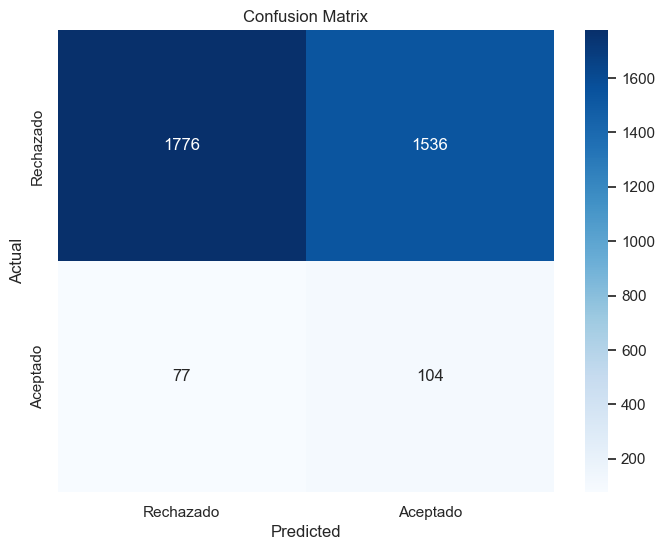

In [213]:
# Para visualizar la matriz de confusión con un mapa de calor:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Rechazado', 'Aceptado'], yticklabels=['Rechazado', 'Aceptado'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Interpretación de las Métricas
Error Cuadrático Medio (0,4618) indica que, en promedio, hay un error cuadrático de aproximadamente 0.46.

La exactitud mide la proporción de predicciones correctas sobre el total de predicciones. Tiene un valor del 53,82% indicando que el modelo está prediciendo correctamente aproximadamente el 54% de las veces. Esta exactitud no es particularmente alta, lo que sugiere que el modelo puede no estar funcionando suficientemente bien.

La precisión (0,0634) muestra los verdaderos positivos (correctamente predichos como positivos) sobre el total de predicciones positivas. En nuestro caso indica que muy pocas de las predicciones positivas son correctas. Esto es extremadamente bajo y sugiere que el modelo tiene muchos falsos positivos.

Sobre el recall (Sensibilidad) tiene un 57,46% de verdaderos positivos sobre el total de positivos reales. es decir, el modelo está identificando correctamente aproximadamente el 57% de los casos positivos reales.

EL modelo desarrollado tiene un F1 Score: 0,1142. Es una la media armónica entre precisión y recall. Su valor indica un equilibrio muy pobre entre estos dos valores, lo que sugiere que tanto la precisión como el recall son bajos.


Matriz de Confusión:
La matriz muestra que hay muchos falsos positivos (1536), lo cual es consistente con la baja precisión. Aunque el modelo tiene más verdaderos negativos (1776), los falsos positivos son casi igual de altos.

Síntesis del Análisis de Errores: 
El análisis general de los errores del modelo revela que el modelo tiene un rendimiento subóptimo

La exactitud es apenas mejor que una conjetura al azar (50%).
La precisión es muy baja, lo que sugiere que el modelo predice demasiados falsos positivos.
El recall es moderado, indicando que el modelo es capaz de detectar algunos de los verdaderos positivos, pero no de manera confiable.
El F1 Score bajo confirma que hay un pobre equilibrio entre precisión y recall.

Posibles soluciones ante los errores encontrados:

- Recolección de Más Datos: Aumentar la cantidad de datos puede ayudar a mejorar el rendimiento del modelo.
- Ajuste de Hiperparámetros: Utilizar técnicas como Grid Search o Random Search para encontrar los mejores hiperparámetros para tu modelo.
- Balanceo de Clases: Utilizar técnicas como SMOTE para balancear las clases si hay un desbalance significativo.
- Ingeniería de Características: Crear nuevas características relevantes que puedan mejorar la capacidad predictiva del modelo.
- Uso de Modelos Más Complejos: Considerar el uso de modelos más complejos como árboles de decisión, Random Forest, o Gradient Boosting.

In [ ]:
# Crear el reporte de clasificación
class_report = classification_report(y_test3, y_pred3, target_names=['Rechazado', 'Aceptado'])
print(class_report)

              precision    recall  f1-score   support

   Rechazado       0.96      0.54      0.69      3312
    Aceptado       0.06      0.57      0.11       181

    accuracy                           0.54      3493
   macro avg       0.51      0.56      0.40      3493
weighted avg       0.91      0.54      0.66      3493



In [ ]:
# Crear predicciones de probabilidad
y_pred_prob3 = model.predict_proba(X_test3)[:, 1]

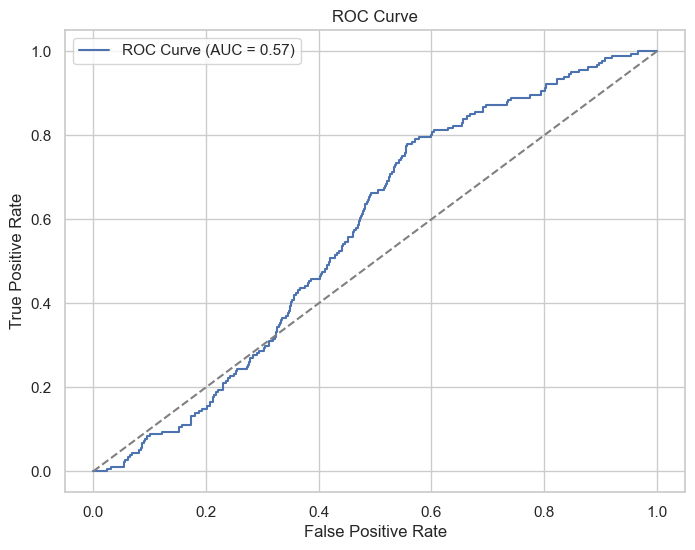

In [ ]:
# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test3, y_pred_prob3)
auc_score = roc_auc_score(y_test3, y_pred_prob3)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show() 

Un AUC de 0,57 sugiere que el modelo tiene un rendimiento ligeramente mejor que un clasificador aleatorio, pero aún así es relativamente bajo. 

La curva ROC correspondiente puede no estar muy alejada de la línea diagonal, lo que indica que el modelo no es muy efectivo para distinguir entre clases positivas y negativas.

In [ ]:
# Crear un DataFrame con las predicciones y valores reales
results = X_test3.copy()
results['actual'] = y_test3
results['predicted'] = y_pred3

# Filtrar los casos donde el modelo se equivocó
errors = results[results['actual'] != results['predicted']]
print("Errores del modelo:")
print(errors)


Errores del modelo:
       encoded_income_level  encoded_overdraft_protection  \
6140                    1.0                           0.0   
8019                    2.0                           0.0   
7207                    2.0                           1.0   
1511                    2.0                           0.0   
14710                   2.0                           0.0   
...                     ...                           ...   
15596                   2.0                           0.0   
4001                    2.0                           0.0   
733                     2.0                           0.0   
3525                    0.0                           0.0   
12900                   2.0                           0.0   

       encoded_credit_rating  encoded_own_your_home  bank_accounts_open  \
6140                     1.0                    1.0           -0.541435   
8019                     2.0                    0.0           -0.541435   
7207                  

In [ ]:
# Crear un DataFrame con las predicciones y valores reales
results = X_test3.copy()
results['actual'] = y_test3
results['predicted'] = y_pred3

# Filtrar los casos donde el modelo se equivocó
errors = results[results['actual'] != results['predicted']]
print("Errores del modelo:")
print(errors)

# Descripción General
total_predictions = len(y_test3)
total_errors = len(errors)
error_rate = total_errors / total_predictions * 100

print(f"Total de predicciones: {total_predictions}")
print(f"Total de errores: {total_errors}")
print(f"Tasa de error: {error_rate:.2f}%")

# Análisis de Errores
print("Análisis de Errores:")
error_summary = errors.describe()
print(error_summary)

# Interpreta los errores
# Ejemplo de interpretación:
print("\nInterpretación:")
print("El análisis de errores muestra que el modelo tiene una tasa de error del {:.2f}%. Se observa que las características como 'Bank_accounts_open' y 'Average_balance' tienen una variabilidad considerable en los casos donde el modelo se equivocó.".format(error_rate))

# Mejoras Potenciales
print("\nMejoras Potenciales:")
print("Para mejorar el modelo, se podrían considerar las siguientes acciones:")
print("- Ajustar los hiperparámetros del modelo.")
print("- Aumentar el tamaño del conjunto de datos de entrenamiento.")
print("- Probar con otros algoritmos de clasificación.")
print("- Aplicar técnicas de balanceo de clases como SMOTE.")


Errores del modelo:
       encoded_income_level  encoded_overdraft_protection  \
6140                    1.0                           0.0   
8019                    2.0                           0.0   
7207                    2.0                           1.0   
1511                    2.0                           0.0   
14710                   2.0                           0.0   
...                     ...                           ...   
15596                   2.0                           0.0   
4001                    2.0                           0.0   
733                     2.0                           0.0   
3525                    0.0                           0.0   
12900                   2.0                           0.0   

       encoded_credit_rating  encoded_own_your_home  bank_accounts_open  \
6140                     1.0                    1.0           -0.541435   
8019                     2.0                    0.0           -0.541435   
7207                  

Interpretación:
El análisis de errores muestra que el modelo tiene una tasa de error del 46.18%. Se observa que las características como 'Bank_accounts_open' y 'Average_balance' tienen una variabilidad considerable en los casos donde el modelo se equivocó.

Mejoras Potenciales o posibles soluciones:
Para continuar con la mejora del modelo, se podrían considerar las siguientes acciones:
- Ajustar los hiperparámetros del modelo.
- Aumentar el tamaño del conjunto de datos de entrenamiento.
- Probar con otros algoritmos de clasificación.
- Aplicar técnicas de balanceo de clases como SMOTE --> Ya hecha!

# POSIBLES SOLUCIONES (si tienes tiempo)

## - Random Forest
Random Forest es un conjunto de árboles de decisión que puede mejorar la precisión y reducir el sobreajuste.
La idea detrás de Random Forest es crear una "colección" (o "bosque") de árboles de decisión entrenados en diferentes subconjuntos del conjunto de datos y luego promediar las predicciones (en el caso de regresión) o votar por la clase más común (en el caso de clasificación). Esto ayuda a reducir el sobreajuste y mejorar la precisión del modelo.

Además, random forest es menos sensible a los datos ruidosos y a los outliers en comparación con otros modelos.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar que las columnas coincidan
print("Columns in X_train but not in X_test:", set(X_train.columns) - set(X_test.columns))
print("Columns in X_test but not in X_train:", set(X_test.columns) - set(X_train.columns))

# Asegurarse de que X_test tenga las mismas columnas en el mismo orden que X_train
X_test = X_test[X_train.columns]

# Crear y ajustar el modelo
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_classifier.predict(X_test)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

Columns in X_train but not in X_test: set()
Columns in X_test but not in X_train: set()
Random Forest Accuracy: 0.9481820784425995


In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluar el modelo con validación cruzada
scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
print(f'Cross-validated Accuracy: {scores.mean()}')

Cross-validated Accuracy: 0.7682696271285823


Random Forest Accuracy: 0.9481820784425995
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      3312
         1.0       0.50      0.01      0.01       181

    accuracy                           0.95      3493
   macro avg       0.72      0.50      0.49      3493
weighted avg       0.93      0.95      0.92      3493

Confusion Matrix:
[[3311    1]
 [ 180    1]]
ROC-AUC Score: 0.6718161982544639


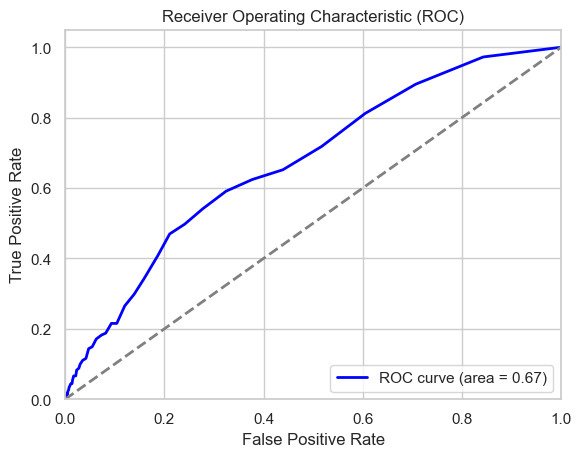

In [ ]:
# Calcular Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

# Calcular otras métricas
print(classification_report(y_test, y_pred_rf))

# Imprimir la Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Calcular el ROC-AUC Score
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc}')

# Dibujar la Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

   ## Interpretación de los resultados de la evaluación del modelo de Random Forest:

Accuracy: El modelo tiene una exactitud del 94.82%, lo que significa que el 94.82% de las predicciones son correctas.

Precision (Precisión): Para la clase 0.0 (aceptación de crédito), la precisión es alta (95%), lo que indica que la mayoría de las instancias predichas como clase 0.0 realmente pertenecen a esa clase. Sin embargo, para la clase 1.0 (rechazo de crédito), la precisión es baja (50%), lo que sugiere que la mitad de las instancias predichas como clase 1.0 en realidad pertenecen a la clase 0.0.

Recall (Sensibilidad): La tasa de recall es alta (100%) para la clase 0.0, lo que indica que el modelo identifica correctamente la mayoría de las instancias de la clase 0.0. Sin embargo, para la clase 1.0, el recall es muy bajo (1%), lo que indica que el modelo identifica muy pocas instancias de la clase 1.0.

F1-Score: El F1-Score es una medida armónica de precisión y recall. Es alto para la clase 0.0 (97%), pero muy bajo para la clase 1.0 (1%), lo que indica un desequilibrio en el rendimiento del modelo entre las dos clases.

Confusion Matrix (Matriz de Confusión): La matriz de confusión muestra que el modelo clasificó la mayoría de las instancias correctamente como clase 0.0 (3311 verdaderos positivos) pero falló en identificar instancias de la clase 1.0 (180 falsos negativos).

ROC-AUC Score: El área bajo la curva ROC es 0.67, lo que indica un rendimiento moderado del modelo para distinguir entre clases. Un valor de 0.5 indica un rendimiento aleatorio, mientras que un valor cercano a 1.0 indica un rendimiento perfecto.

En resumen, el modelo tiene un buen rendimiento para predecir la clase mayoritaria (aceptación de crédito), pero tiene dificultades para identificar la clase minoritaria (rechazo de crédito), lo que sugiere un desequilibrio de clases en los datos y la necesidad de mejorar la capacidad del modelo para detectar la clase minoritaria.

In [ ]:
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Crear un DataFrame para mostrar la importancia de las características
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)

                         feature  importance
12                 total_balance    0.226250
6                customer_number    0.225931
11               average_balance    0.220781
10                household_size    0.068255
8              credit_cards_held    0.050732
4          encoded_credit_rating    0.040180
2           encoded_income_level    0.034620
0                 encoded_reward    0.031305
5          encoded_own_your_home    0.023697
7             bank_accounts_open    0.023199
9                    homes_owned    0.019834
1            encoded_mailer_type    0.017624
3   encoded_overdraft_protection    0.017591


In [214]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear y ajustar el modelo
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Hacer predicciones
y_pred_gb = gb_classifier.predict(X_test)

# Evaluar el modelo
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb}')


Gradient Boosting Accuracy: 0.9478957915831663


Gradient Boosting Accuracy: 0.9478957915831663
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      3312
         1.0       0.00      0.00      0.00       181

    accuracy                           0.95      3493
   macro avg       0.47      0.50      0.49      3493
weighted avg       0.90      0.95      0.92      3493

Confusion Matrix:
[[3311    1]
 [ 181    0]]
ROC-AUC Score: 0.49984903381642515


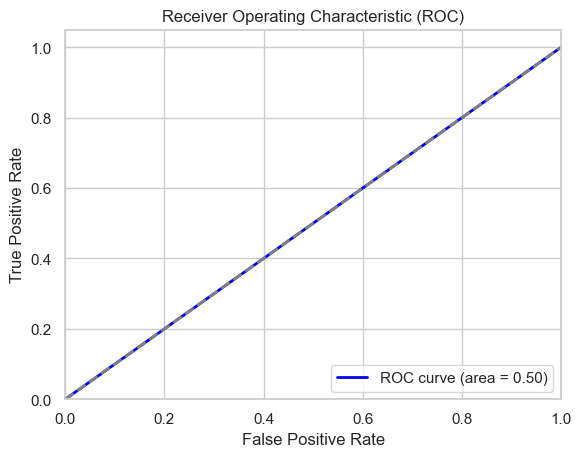

In [220]:
# Calcular Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb}')

# Calcular otras métricas
print(classification_report(y_test, y_pred_gb))

# Imprimir la Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:")
print(conf_matrix)

# Calcular el ROC-AUC Score
y_pred_proba = gb_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_gb)
print(f'ROC-AUC Score: {roc_auc}')

# Dibujar la Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_gb)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.svm import SVC

# Crear y ajustar el modelo
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

# Hacer predicciones
y_pred_svm = svm_classifier.predict(X_test)

# Evaluar el modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')

SVM Accuracy: 0.9481820784425995


In [222]:
from sklearn.neural_network import MLPClassifier

# Crear y ajustar el modelo
mlp_classifier = MLPClassifier(random_state=42, max_iter=1000)
mlp_classifier.fit(X_train, y_train)

# Hacer predicciones
y_pred_mlp = mlp_classifier.predict(X_test)

# Evaluar el modelo
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'Neural Network Accuracy: {accuracy_mlp}')

Neural Network Accuracy: 0.9410249069567707


Neural Network Accuracy: 0.9410249069567707
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      3312
         1.0       0.16      0.03      0.06       181

    accuracy                           0.94      3493
   macro avg       0.56      0.51      0.51      3493
weighted avg       0.91      0.94      0.92      3493

Confusion Matrix:
[[3281   31]
 [ 175    6]]
ROC-AUC Score: 0.5118946339445378


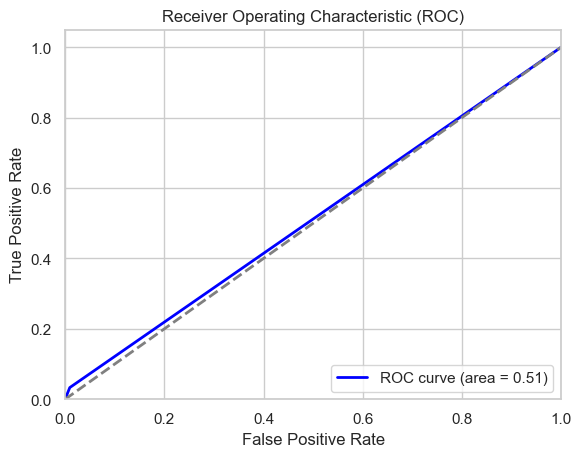

In [223]:
# Calcular Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_mlp)
print(f'Neural Network Accuracy: {accuracy_mlp}')

# Calcular otras métricas
print(classification_report(y_test, y_pred_mlp))

# Imprimir la Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
print("Confusion Matrix:")
print(conf_matrix)

# Calcular el ROC-AUC Score
y_pred_proba = mlp_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_mlp)
print(f'ROC-AUC Score: {roc_auc}')

# Dibujar la Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_mlp)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df_concat1.to_csv('df_credit_risk.csv', index=False)